# Importing The Necessary Libraries

In [1]:
import warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

### Indented block

In [14]:
data=pd.read_csv("water_dataX.csv",encoding='ISO-8859-1',low_memory=False)


In [7]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


# Analyse the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [9]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [10]:
data.shape

(1991, 12)

# Handling the Missing Values

In [11]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [12]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

# Checking The Data Types

In [15]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [16]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

# Handling Missing Values 2

In [17]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [18]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

# Handling Missing values 3

In [19]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [20]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [21]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [22]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [23]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


 ## Renaming The Column Names

In [24]:
data=data.rename(columns = {'D.O. (mg/l)':'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns = {'B.O.D. (mg/l)':'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns =  {'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns =  {'STATION CODE':'station'})
data=data.rename(columns =  {'LOCATIONS':'location'})
data=data.rename(columns =  {'STATE':'state'})
data=data.rename(columns =  {'PH':'ph'})

In [25]:

data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


# wqi calculation 

In [26]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [27]:
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [28]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))


In [29]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [30]:
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [31]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [32]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,80,60,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,80,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,80,40,100,80,100


In [33]:
data.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

# WATER QUALITY INDEX CALCULATION

In [34]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 

In [35]:
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [36]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


# Calculating Overall Water Quality Index for Each Year

In [37]:
average=data.groupby('year')['wqi'].mean()

In [38]:
average

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
2008    73.506289
2009    74.456685
2010    75.454787
2011    76.666580
2012    79.496712
2013    76.494789
2014    77.839592
Name: wqi, dtype: float64

In [39]:
df1=average.reset_index(level=0,inplace=False)
df1

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


# DATA VISUALIZATION

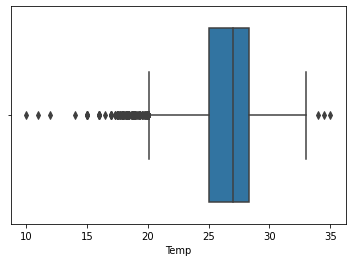

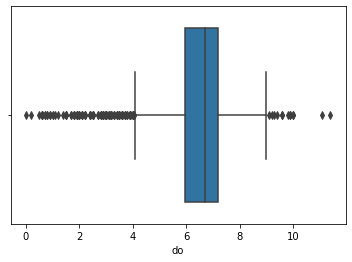

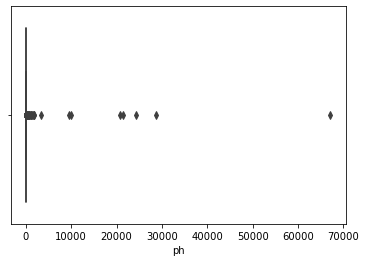

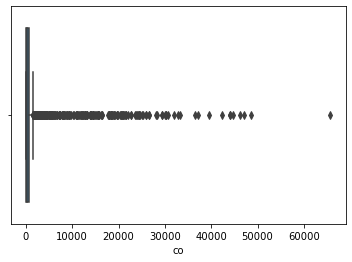

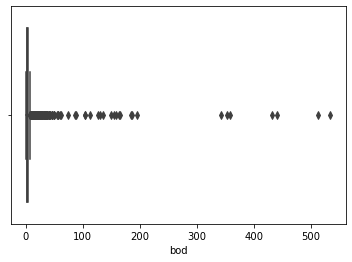

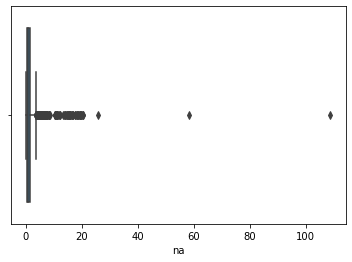

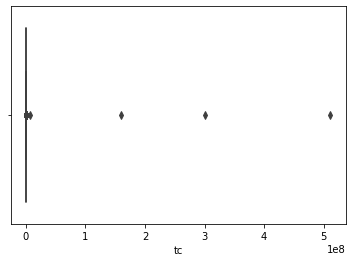

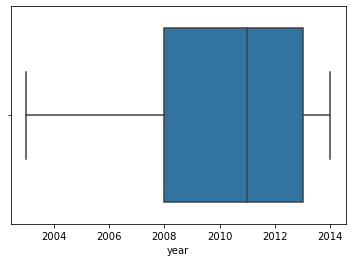

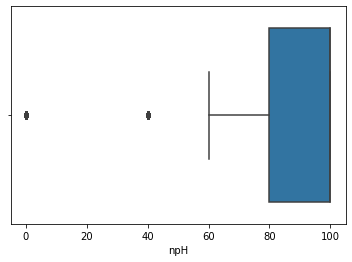

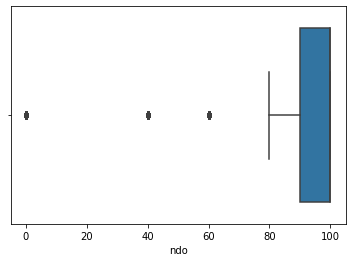

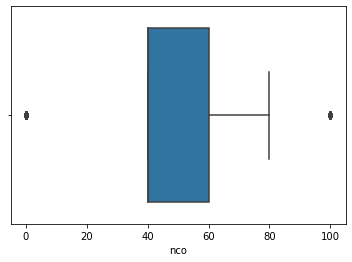

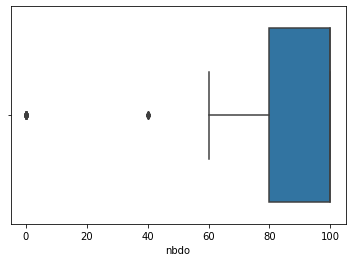

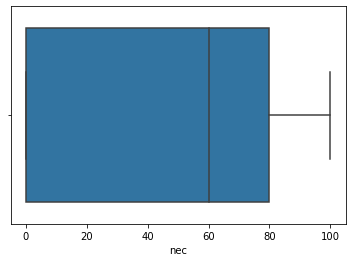

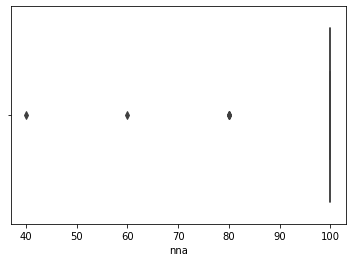

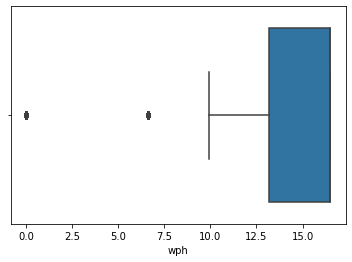

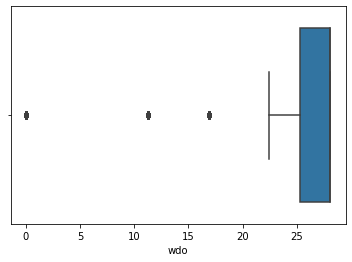

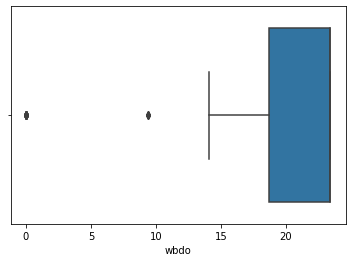

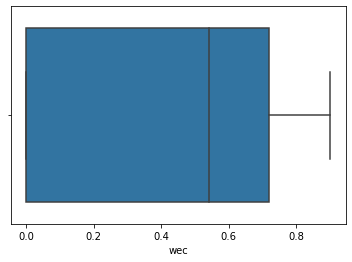

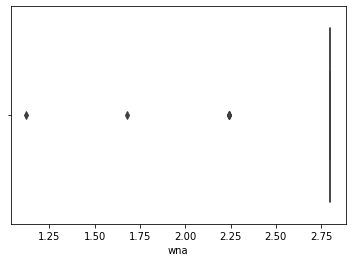

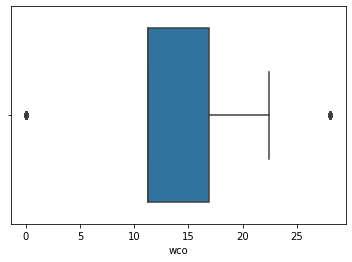

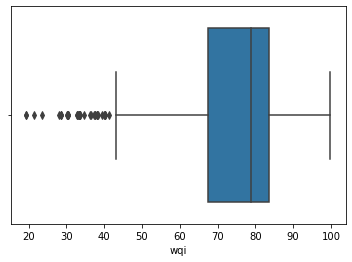

In [40]:
for col in data.columns:
    if data.dtypes[col]=='float64'or data.dtypes[col]=='int64':
        sns.boxplot(x=data[col]).set(xlabel=col)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


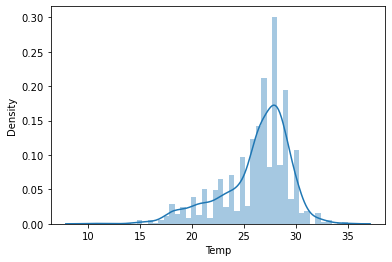

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


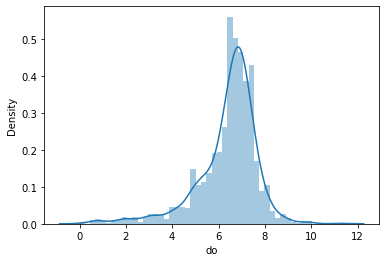

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


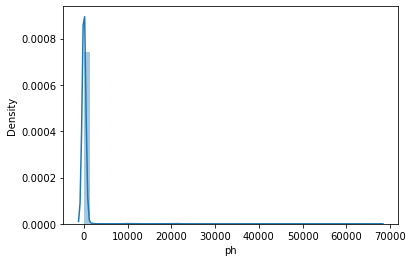

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


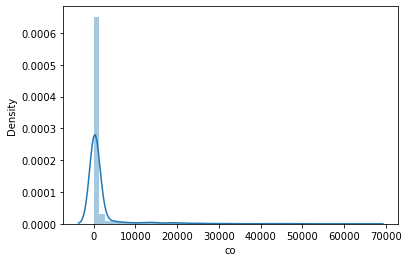

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


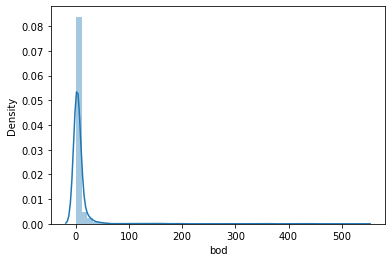

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


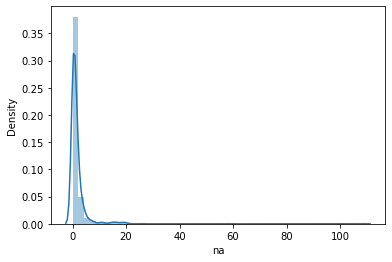

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


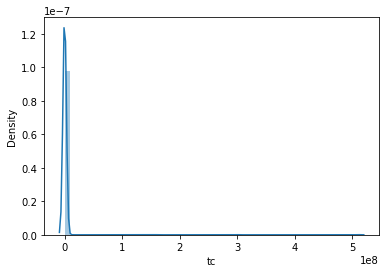

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


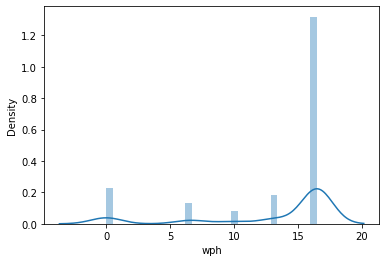

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


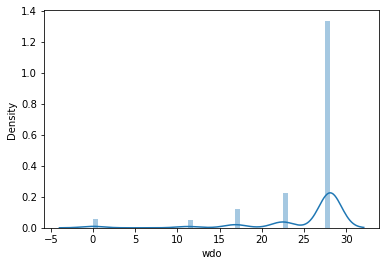

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


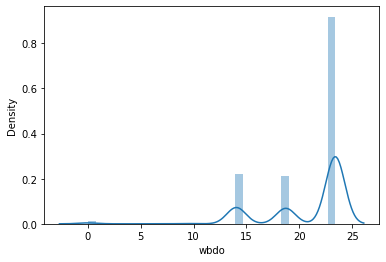

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


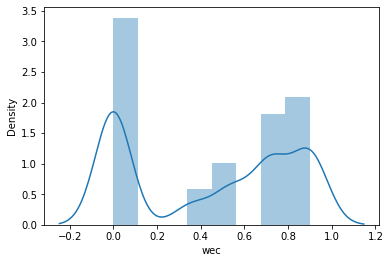

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


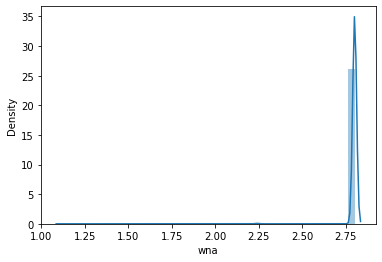

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


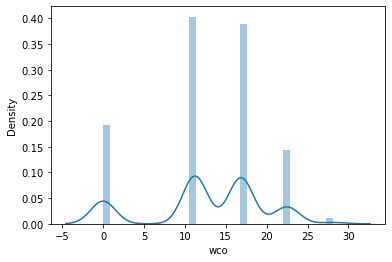

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


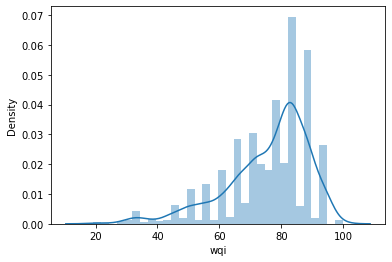

In [41]:
for col in data.columns:
    if data.dtypes[col]=='float64':
        sns.distplot(x=data[col]).set(xlabel=col)
        plt.show()

<AxesSubplot:>

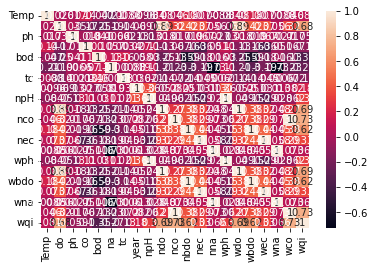

In [42]:
sns.heatmap(data.corr(),annot=True)

In [43]:
data.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)
data.head()

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,77.14


### Splitting Dataset into Dependent and Independent Columns

In [44]:
x=data.iloc[:,0:7].values
y=data.iloc[:,7:].values

In [45]:
x.shape

(1991, 7)

In [46]:
y.shape

(1991, 1)

In [47]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [48]:
y

array([[84.46],
       [76.96],
       [79.28],
       ...,
       [66.44],
       [66.44],
       [66.44]])